# Data exploration summary: screen size

This notebook explores how screen size relates to sales price.
- Bigger laptops sell for more.
- *Generally*, including size in the title and descirption is associated with higher sale price.
- But there's some complication. Including size in title increases sales price when we look at the major sizes (13" and 15");
- but we get strange results if the user listed 13.3" and 15.4"—an effect I'm still looking in to.

In [1]:
import pandas as pd

laptopData = pd.read_csv("fulldataset.csv", encoding = 'ISO-8859-1')

#since we're visualizing data in connection with size, drop missing values for size. also, group 13.3" with 13", and 15.4" with 15".
laptopData = laptopData.dropna(subset=['size'])
laptopData.head()

,itemId,description,year,size,memory,title,condition,price,watchCount,brand_new_in_description,...,used_in_description,used_in_title,year_in_description,year_in_title,size_in_description,size_in_title,memory_in_description,memory_in_title,n_words_in_descr_<_10,n_words_in_title
0,2.940000e+11,I have a beautiful MacBook Pro for sale. It ha...,2009.0,15.0,120.0,Apple MacBook Pro OSX 2016 2.53GHz 4GB 120GB S...,Seller refurbished,300.0,7.0,False,...,True,False,False,False,True,True,True,True,False,13
1,2.750000e+11,MacBook Pro 13inch (Early 2011) in great condi...,2011.0,13.0,120.0,MacBook Pro 13-inch Early 2011 120GB SSD/10GB RAM,Used,249.0,2.0,False,...,False,False,True,True,True,True,True,True,False,7
2,2.240000e+11,Apple 15' MacBook Pro 2010 2.4GHz Core i5 120G...,2010.0,15.0,120.0,Apple 15' MacBook Pro 2010 2.4GHz Core i5 120G...,Used,245.0,4.0,False,...,True,False,True,True,True,True,True,True,False,13
3,1.740000e+11,FOR SALE APPLE MACBOOK PRO A1278 13' LATE-2011...,2011.0,13.0,120.0,APPLE MACBOOK PRO A1278 13' LATE-2011 I5-2435M...,Used,369.0,NaN,False,...,False,False,True,True,True,True,True,True,False,12
4,1.340000e+11,13' MacBook Pro 2.4GHZ i5 Processor\n4GB Ram\...,2011.0,13.3,120.0,Apple MacBook Pro 2.4gzh Intel Core i5/4gb ram...,Used,445.0,1.0,False,...,False,False,False,True,False,False,False,True,False,10


As we might expect, the larger the screen size, the higher the final selling price:

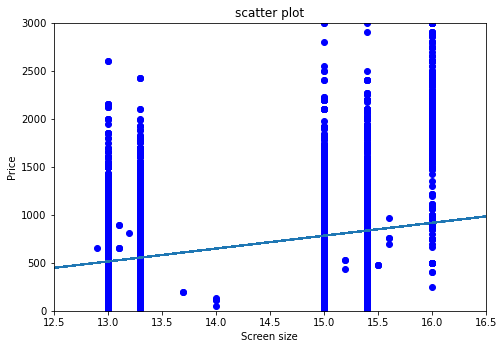

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m, b = np.polyfit(laptopData["size"], laptopData["price"], 1)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(laptopData["size"], laptopData["price"], color='b')
ax.set_xlabel('Screen size')
ax.set_ylabel('Price')
ax.set_title('scatter plot')
plt.plot(laptopData["size"], m*laptopData["size"] + b)
plt.xlim(12.5, 16.5)
plt.ylim(0, 3000)
plt.show()

It seems that including screen size in the title is associated with higher sales price across 13" and 15" screens, but with the complication that those reporting as 13.3"/15.4" are exceptional:

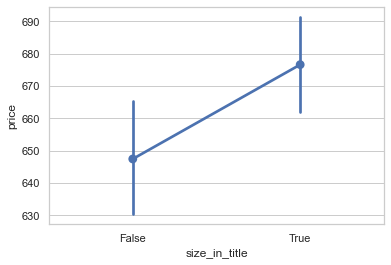

In [5]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.pointplot(x="size_in_title", y="price", data=laptopData)

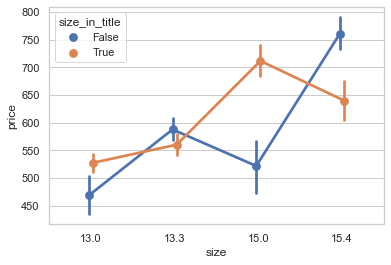

In [3]:
import seaborn as sns
sns.set_theme(style="whitegrid")

laptopData2 = laptopData[(laptopData['size'] == 13) | (laptopData['size'] == 13.3) | (laptopData['size'] == 15) | (laptopData['size'] == 15.4)]

ax = sns.pointplot(x="size", y="price", hue="size_in_title", dodge=True, data=laptopData2)

As for those 16" laptops, there isn't enough data on cases where the seller left out the size from the title—there have only been three such cases!

In [4]:
laptopData2 = laptopData[(laptopData['size'] == 16) & (laptopData['size_in_title'] == False)]
len(laptopData2)

3

Including size in the *description* also yields an effect, in particular for 15":

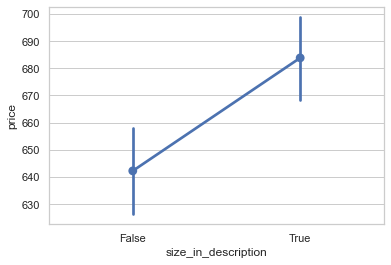

In [6]:
ax = sns.pointplot(x="size_in_description", y="price", data=laptopData)

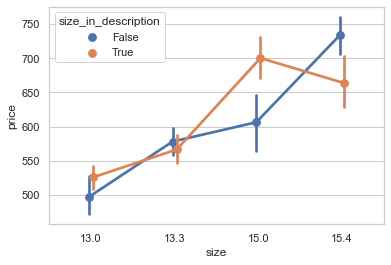

In [4]:
laptopData2 = laptopData[(laptopData['size'] == 13) | (laptopData['size'] == 13.3) | (laptopData['size'] == 15) 
                    | (laptopData['size'] == 15.4)]

ax = sns.pointplot(x="size", y="price", hue="size_in_description", dodge=True, data=laptopData2)

No effect for 16" screens:

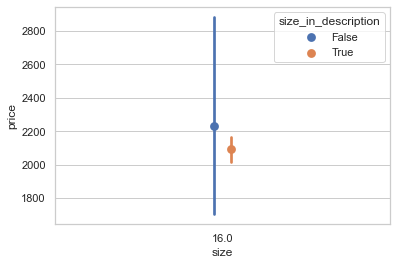

In [6]:
laptopData2 = laptopData[(laptopData['size'] == 16)]

ax = sns.pointplot(x="size", y="price", hue="size_in_description", dodge=True, data=laptopData2)